# Getting Started

In [202]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from collections import Counter
from mpl_toolkits.basemap import Basemap 
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
import itertools

In [183]:
imdb=pd.read_csv('/Users/kaoichen/Downloads/movie_metadata.csv')

In [5]:
imdb.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [145]:
imdb.dtypes

color                          int64
director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes       float64
gross                        float64
genres                        object
actor_1_name                  object
movie_title                   object
num_voted_users                int64
cast_total_facebook_likes      int64
actor_3_name                  object
facenumber_in_poster         float64
plot_keywords                 object
movie_imdb_link               object
num_user_for_reviews         float64
language                      object
country                       object
content_rating                object
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
aspect_ratio                 float64
m

In [141]:
imdb.describe()

,color,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,ROI
count,5043.000000,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4551.000000,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000,3.891000e+03
mean,0.954789,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,39.752620,2002.470517,1651.754473,6.442138,2.220403,7525.964505,6.253747e+06
std,0.207788,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,206.114898,12.474599,4042.438863,1.125116,1.385113,19320.445110,1.296224e+08
min,0.000000,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,0.000218,1916.000000,0.000000,1.600000,1.180000,0.000000,1.800000e+01
25%,1.000000,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000,1999.000000,281.000000,5.800000,1.850000,0.000000,4.510462e+05
50%,1.000000,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,20.000000,2005.000000,595.000000,6.600000,2.350000,166.000000,1.070655e+06
75%,1.000000,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,45.000000,2011.000000,918.000000,7.200000,2.350000,3000.000000,2.228541e+06
max,1.000000,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,12215.500000,2016.000000,137000.000000,9.500000,16.000000,349000.000000,7.194486e+09


In [7]:
imdb['color'].unique()

array(['Color', nan, ' Black and White'], dtype=object)

# Cleansing 

In [184]:
imdb['color']=imdb['color'].map(lambda x: 1 if x=='Color' else 0)

In [185]:
imdb['budget']=imdb['budget'].apply(lambda x: x/1000000)

In [186]:
imdb.sort_values(by='title_year', ascending = False)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
2366,1,Rob Hawk,6.0,90.0,97.0,319.0,Erin O'Brien,731.0,NaN,Action|Drama,...,6.0,English,USA,NaN,27.0,2016.0,634.0,5.0,NaN,1000
3817,1,Kevin Smith,35.0,88.0,0.0,1000.0,Haley Joel Osment,40000.0,NaN,Comedy|Fantasy|Horror|Thriller,...,4.0,English,USA,PG-13,5.0,2016.0,3000.0,4.8,NaN,0
1367,1,J Blakeson,194.0,112.0,5.0,724.0,Maggie Siff,17000.0,34912982.0,Action|Adventure|Sci-Fi|Thriller,...,266.0,English,USA,PG-13,38.0,2016.0,1000.0,5.2,2.35,14000
1742,1,Ben Falcone,154.0,99.0,265.0,265.0,Tyler Labine,22000.0,63034755.0,Comedy,...,96.0,English,USA,R,29.0,2016.0,779.0,5.3,1.85,0
519,1,Yarrow Cheney,165.0,87.0,11.0,745.0,Eric Stonestreet,1000.0,323505540.0,Animation|Comedy|Family,...,155.0,English,Japan,PG,75.0,2016.0,904.0,6.8,1.85,36000
380,1,Jon M. Chu,196.0,129.0,209.0,886.0,Morgan Freeman,11000.0,64685359.0,Action|Adventure|Comedy|Crime|Mystery|Thriller,...,139.0,English,USA,PG-13,90.0,2016.0,11000.0,6.9,2.35,15000
108,1,Duncan Jones,275.0,123.0,0.0,648.0,Callum Rennie,3000.0,46978995.0,Action|Adventure|Fantasy,...,781.0,English,USA,PG-13,160.0,2016.0,716.0,7.3,2.35,89000
106,1,James Bobin,218.0,113.0,33.0,11000.0,Alan Rickman,40000.0,76846624.0,Adventure|Family|Fantasy,...,131.0,English,USA,PG,170.0,2016.0,25000.0,6.4,1.85,30000
3129,1,David Lowery,78.0,102.0,38.0,190.0,Oona Laurence,3000.0,NaN,Adventure|Family|Fantasy,...,6.0,English,USA,PG,65.0,2016.0,424.0,7.3,2.35,21000
942,1,Rawson Marshall Thurber,177.0,107.0,43.0,569.0,Thomas Kretschmann,12000.0,126088877.0,Action|Comedy|Crime,...,110.0,English,USA,PG-13,50.0,2016.0,919.0,6.6,2.35,10000


In [187]:
imdb_us=imdb[imdb['country']=='USA']

In [188]:
imdb['ROI']=imdb['gross']/imdb['budget']
imdb['ROI']=imdb['ROI'].apply(float)

In [118]:
## Are there corelation between imdb score and 

# Exploration-- Descriptive 

In [189]:
country_lst= Counter(imdb['country'])
print country_lst
print type(country_lst)

Counter({'USA': 3807, 'UK': 448, 'France': 154, 'Canada': 126, 'Germany': 97, 'Australia': 55, 'India': 34, 'Spain': 33, 'China': 30, 'Italy': 23, 'Japan': 23, 'Hong Kong': 17, 'Mexico': 17, 'New Zealand': 15, 'South Korea': 14, 'Ireland': 12, 'Denmark': 11, 'Russia': 11, 'Norway': 8, 'Brazil': 8, 'South Africa': 8, 'Sweden': 6, nan: 5, 'Thailand': 5, 'Netherlands': 5, 'Poland': 5, 'Argentina': 4, 'Iran': 4, 'Belgium': 4, 'Israel': 4, 'Romania': 4, 'Czech Republic': 3, 'West Germany': 3, 'Iceland': 3, 'Switzerland': 3, 'Taiwan': 2, 'Hungary': 2, 'Greece': 2, 'Afghanistan': 1, 'Panama': 1, 'Kyrgyzstan': 1, 'Cambodia': 1, 'Bahamas': 1, 'Georgia': 1, 'Aruba': 1, 'Peru': 1, 'Nigeria': 1, 'Kenya': 1, 'Slovakia': 1, 'Indonesia': 1, 'Official site': 1, 'New Line': 1, 'Slovenia': 1, 'Chile': 1, 'Dominican Republic': 1, 'Bulgaria': 1, 'Colombia': 1, 'Libya': 1, 'Finland': 1, 'Cameroon': 1, 'Turkey': 1, 'Philippines': 1, 'Soviet Union': 1, 'Pakistan': 1, 'Egypt': 1, 'United Arab Emirates': 1})
<

In [190]:
prod_country={}
for x,y in country_lst.most_common():
    prod_country[x]=y
print prod_country

{'Canada': 126, 'Brazil': 8, 'Italy': 23, 'Czech Republic': 3, 'USA': 3807, 'Afghanistan': 1, 'Panama': 1, 'Hungary': 2, 'Cambodia': 1, 'France': 154, 'Bahamas': 1, 'West Germany': 3, 'Georgia': 1, 'Aruba': 1, 'Ireland': 12, 'Argentina': 4, 'Norway': 8, 'Nigeria': 1, 'Kenya': 1, nan: 5, 'Slovakia': 1, 'Israel': 4, 'Australia': 55, 'Iran': 4, 'Iceland': 3, 'Official site': 1, 'New Line': 1, 'Slovenia': 1, 'Germany': 97, 'Chile': 1, 'Belgium': 4, 'China': 30, 'Dominican Republic': 1, 'Soviet Union': 1, 'Hong Kong': 17, 'Taiwan': 2, 'Spain': 33, 'Kyrgyzstan': 1, 'Netherlands': 5, 'Colombia': 1, 'Libya': 1, 'Denmark': 11, 'Poland': 5, 'Indonesia': 1, 'Cameroon': 1, 'Turkey': 1, 'Philippines': 1, 'Sweden': 6, 'Finland': 1, 'Thailand': 5, 'Switzerland': 3, 'New Zealand': 15, 'Russia': 11, 'Bulgaria': 1, 'Pakistan': 1, 'Romania': 4, 'Mexico': 17, 'Egypt': 1, 'United Arab Emirates': 1, 'South Africa': 8, 'India': 34, 'Peru': 1, 'UK': 448, 'Greece': 2, 'Japan': 23, 'South Korea': 14}


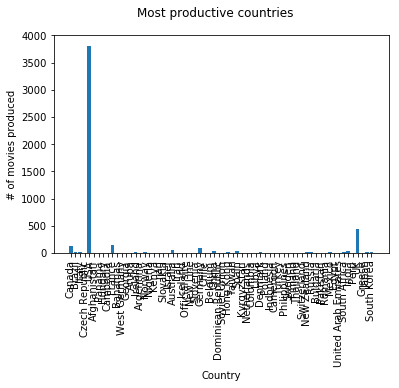

In [191]:
plt.bar(range(len(prod_country)), prod_country.values(),align='center')
plt.xticks(range(len(prod_country)), prod_country.keys(),rotation='vertical')
plt.suptitle('Most productive countries')
plt.xlabel('Country')
plt.ylabel('# of movies produced')
plt.show()

In [192]:
prod_country20={}
for x,y in country_lst.most_common(20):
    prod_country20[x]=y
    
print prod_country20

num_of_movies20, countries20 = zip(*sorted(zip(prod_country20.values(), prod_country20.keys()), reverse = True))

{'Canada': 126, 'Brazil': 8, 'Russia': 11, 'Australia': 55, 'Italy': 23, 'Ireland': 12, 'USA': 3807, 'Mexico': 17, 'Denmark': 11, 'India': 34, 'France': 154, 'Norway': 8, 'Germany': 97, 'UK': 448, 'Japan': 23, 'China': 30, 'New Zealand': 15, 'Hong Kong': 17, 'South Korea': 14, 'Spain': 33}


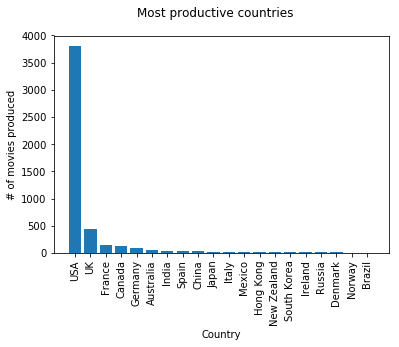

In [193]:
bar=plt.bar(range(len(num_of_movies20)), num_of_movies20,align='center',width=0.8)
plt.xticks(range(len(countries20)), countries20,rotation='vertical')
plt.suptitle('Most productive countries')
plt.xlabel('Country')
plt.ylabel('# of movies produced')
plt.show()

# Exploration -- Corelations 

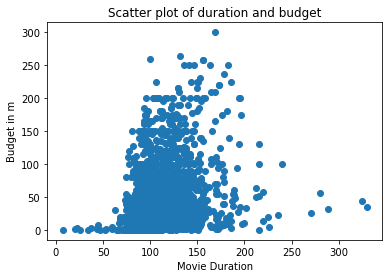

In [132]:
# Do longer movies cost more moeny?
# movie duration vs. budget 

x= imdb_us['duration']
y= imdb_us['budget']
plt.title('Scatter plot of duration and budget')
plt.xlabel('Movie Duration')
plt.ylabel('Budget in m')
plt.scatter(x,y)
plt.show()

#Answer: Nope

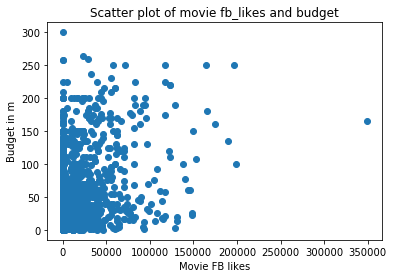

In [124]:
# Do movies with higher budget get more likes?
# movie fb likes vs. budget 

x= imdb_us['movie_facebook_likes']
y= imdb_us['budget']
plt.title('Scatter plot of movie fb_likes and budget')
plt.xlabel('Movie FB likes')
plt.ylabel('Budget in m')
plt.scatter(x,y)
plt.show()

#Answer: Nope

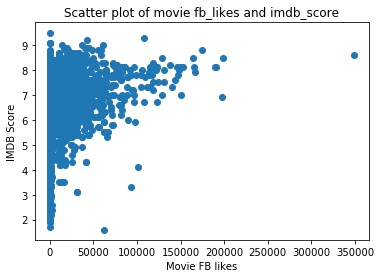

In [110]:
# Do better movies (with higher imdb score) get more fb likes
# IMDB score vs movie FB likes 

x= imdb['movie_facebook_likes']
y= imdb['imdb_score']
plt.title('Scatter plot of movie fb_likes and imdb_score')
plt.xlabel('Movie FB likes')
plt.ylabel('IMDB Score')
plt.scatter(x,y)
plt.show()

#Answer: Kind of 

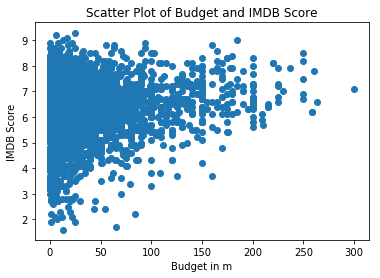

In [125]:
# Do better movies require higher budget to film
# IMDB score vs budget

x= imdb_us['budget']
y= imdb_us['imdb_score']
plt.title('Scatter Plot of Budget and IMDB Score')
plt.xlabel('Budget in m')
plt.ylabel('IMDB Score')
plt.scatter(x,y)
plt.show()



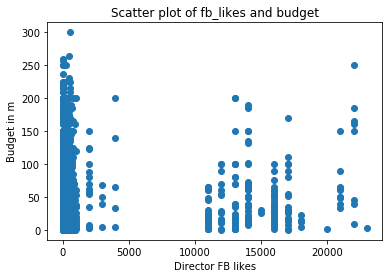

In [108]:
# Do directors with higher FB likes get more budget for their movies?
# Budget vs director FB likes 

x= imdb_us['director_facebook_likes']
y= imdb_us['budget']
plt.title('Scatter plot of fb_likes and budget')
plt.xlabel('Director FB likes')
plt.ylabel('Budget in m')
plt.scatter(x,y)
plt.show()

#Answer: Probably Not 

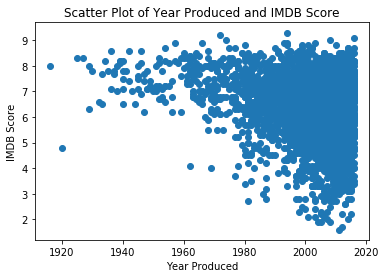

In [86]:
# Do audiences lower or higher their standard over the year?
# IMDB score vs year of production

x= imdb['title_year']
y= imdb['imdb_score']
plt.title('Scatter Plot of Year Produced and IMDB Score')
plt.xlabel('Year Produced')
plt.ylabel('IMDB Score')
plt.scatter(x,y)
plt.show()

# Answer: Yes, but wait 

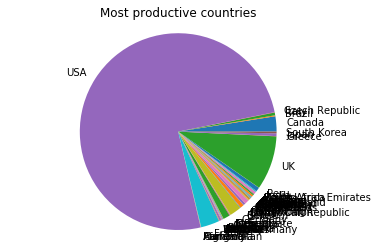

In [99]:
# Which countries produce the most movies 

values=[prod_country[i] for i in prod_country]
labels= [i for i in prod_country]
plt.pie(values, labels=labels)
plt.title('Most productive countries')

plt.axis('equal')
plt.show()

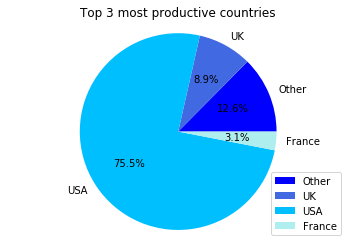

In [137]:
def cleans_country(x):
    if x in ('USA','France','UK'):
        return x
    else:
        return "Other"
    
imdb['productive_countries']= imdb['country'].apply(cleans_country)

prod_country3={}
for x,y in Counter(imdb['productive_countries']).most_common():
    prod_country3[x]=y

values=[prod_country3[i] for i in prod_country3]
labels= [i for i in prod_country3]
colors=['blue','royalblue','deepskyblue','paleturquoise']
pie=plt.pie(values, labels=labels,autopct='%1.1f%%',colors=colors)
plt.title('Top 3 most productive countries')
plt.axis('equal')
plt.legend(labels, loc="lower right")
plt.show()

In [182]:
# Who is the director of highest ROI
director_roi = imdb[['director_name','country','ROI']].groupby(by='director_name').mean().sort_values(by='ROI',ascending=False)
director_roi.head()

,ROI
director_name,
Oren Peli,7.194486e+09
Jonathan Caouette,2.715661e+09
Daniel Myrick,2.342169e+09
Travis Cluff,2.275782e+08
Edward Burns,1.376910e+08
